In [1]:
import os
import pandas as pd
import numpy as np

def visulize_result_with_condition(matrixes, dir_path='.'):
    # print(f"experiment: {condition}")
    return_values = np.array([])
    for matrix in matrixes:
        for filename in os.listdir(os.path.abspath(dir_path)):
            if matrix in filename:
                file_path = os.path.join(os.path.abspath(dir_path), filename)
                result = pd.read_csv(file_path)
                mean_value = round(result[matrix].mean(), 5)
                mean_value *= 100
                # print(f'{matrix}: {mean_value:.5}')
                return_values = np.append(return_values, round(mean_value, 3))
    
    experiment_condition = dir_path.split('/')
    if experiment_condition[1] == 'small_dataset':
        return f'(small dataset {experiment_condition[1]}) {experiment_condition[2]}', return_values    
    
    return f'({experiment_condition[1]}) {experiment_condition[2]}', return_values

In [9]:
matrixes = [
    'faithfulness',
    'answer_relevancy',
    'answer_similarity',
    'answer_correctness',
    'context_precision',
    'context_utilization',
    'context_recall',
    'context_entity_recall'
]

condition = "condition_3"

paths = [
    # "./small_dataset/1500/one",
    # "./small_dataset/1500/top1_predictor",
    # "./small_dataset/3000/one",
    # "./small_dataset/3000/all-level",
    # "./small_dataset/3000/top1_predictor",
    # "./small_dataset/3000/top2_predictor",
    # "./small_dataset/3000/top3_predictor",
    # "./small_dataset/retrieve_5/one",
    # "./small_dataset/retrieve_10/one",
    "./10000/one",
    "./10000/document",
    "./10000/section",
    "./10000/paragraph",
    "./10000/multi",
    "./10000/predictor_top1",
    "./10000/predictor_top2",
    # "./10000/predictor_top3",
    "./10000/predictor_over25",
    "./10000/one_topp",
    "./10000/document_topp",
    "./10000/section_topp",
    "./10000/paragraph_topp",
    "./10000/multi_topp",
    "./10000/predictor_top1_topp",
    "./10000/predictor_top2_topp",
    # "./10000/predictor_top3_topp",
    "./10000/predictor_over25_topp",
    './10000/top2_better_model',
    './10000/top2_topp_better_model',
    "./10000/predictor_top2_similarity",
    "./10000/native_rag"
    
]

experiment_conditions = []
values = []
for path in paths:
    experiment_condition, value = visulize_result_with_condition(matrixes, path)
    experiment_conditions.append(experiment_condition)
    values.append(value)

In [10]:
for condition in ['correct retrieve', '(retrieve 5) one', '(retrieve 2 each level) all-level', '(retrieve 5) top1_predictor', '(retrieve 5) sentence splitter']:
    experiment_conditions.append(condition)
    
addtional_values = [
    np.array([86.317, 90.15, 95.21, 82.04, 94.978, 95.426, 92.481, 68.379]),
    np.array([88.979, 92.952, 93.552, 68.136, 54.773, 61.78, 85.927, 40.775]),
    np.array([79.163, 86.223, 91.989, 62.694, 70.137, 80.251, 67.673, 43.34]),
    np.array([63.286, 74.812, 88.652, 52.215, 57.486, 67.245, 42.573, 25.196]),
    np.array([72.08, 83.884, 88.721, 42.245, 59.756, 80.335, 29.819, 9.969]),
]

values.extend(addtional_values)

In [11]:
print(len(experiment_conditions))
print(len(values))

25
25


In [12]:
experiment_conditions

['(10000) one',
 '(10000) document',
 '(10000) section',
 '(10000) paragraph',
 '(10000) multi',
 '(10000) predictor_top1',
 '(10000) predictor_top2',
 '(10000) predictor_over25',
 '(10000) one_topp',
 '(10000) document_topp',
 '(10000) section_topp',
 '(10000) paragraph_topp',
 '(10000) multi_topp',
 '(10000) predictor_top1_topp',
 '(10000) predictor_top2_topp',
 '(10000) predictor_over25_topp',
 '(10000) top2_better_model',
 '(10000) top2_topp_better_model',
 '(10000) predictor_top2_similarity',
 '(10000) native_rag',
 'correct retrieve',
 '(retrieve 5) one',
 '(retrieve 2 each level) all-level',
 '(retrieve 5) top1_predictor',
 '(retrieve 5) sentence splitter']

In [13]:
values

[array([89.228, 93.802, 93.63 , 66.661, 75.483, 81.794, 86.061, 51.232]),
 array([50.934, 85.487, 41.773, 41.36 , 48.648, 26.755, 15.544, 15.377]),
 array([77.115, 87.776, 91.54 , 57.489, 65.302, 74.785, 63.602, 35.226]),
 array([85.653, 91.78 , 92.374, 59.45 , 62.797, 72.184, 73.491, 33.577]),
 array([86.226, 92.911, 92.729, 61.674, 64.498, 75.103, 73.751, 37.301]),
 array([64.079, 76.495, 88.731, 51.093, 53.876, 61.534, 46.005, 25.141]),
 array([86.22 , 92.486, 92.674, 62.469, 55.655, 62.456, 79.42 , 39.157]),
 array([51.018, 62.794, 85.246, 41.851, 41.29 , 48.526, 27.974, 15.876]),
 array([86.246, 91.235, 93.438, 68.788, 80.553, 87.552, 79.1  , 51.56 ]),
 array([47.401, 59.942, 84.998, 40.925, 43.853, 53.779, 23.435, 14.353]),
 array([73.313, 84.234, 91.183, 57.245, 71.512, 80.367, 55.128, 33.936]),
 array([80.497, 88.023, 91.838, 59.09 , 67.191, 78.804, 64.934, 32.758]),
 array([81.366, 90.339, 92.451, 63.046, 82.414, 63.946, 35.907, 36.494]),
 array([61.047, 74.404, 88.398, 50.597

In [14]:
len(values)

25

In [15]:
# Define the metric names
metrics = [
    "faithfulness",
    "answer_relevancy",
    "answer_similarity",
    "answer_correctness",
    "context_precision",
    "context_utilization",
    "context_recall",
    "context_entity_recall",
]

# Create a DataFrame
df = pd.DataFrame(values, columns=metrics)
df.insert(0, "experiment_condition", experiment_conditions)

# Display the DataFrame
df

,experiment_condition,faithfulness,answer_relevancy,answer_similarity,answer_correctness,context_precision,context_utilization,context_recall,context_entity_recall
0,(10000) one,89.228,93.802,93.630,66.661,75.483,81.794,86.061,51.232
1,(10000) document,50.934,85.487,41.773,41.360,48.648,26.755,15.544,15.377
2,(10000) section,77.115,87.776,91.540,57.489,65.302,74.785,63.602,35.226
3,(10000) paragraph,85.653,91.780,92.374,59.450,62.797,72.184,73.491,33.577
4,(10000) multi,86.226,92.911,92.729,61.674,64.498,75.103,73.751,37.301
5,(10000) predictor_top1,64.079,76.495,88.731,51.093,53.876,61.534,46.005,25.141
6,(10000) predictor_top2,86.220,92.486,92.674,62.469,55.655,62.456,79.420,39.157
7,(10000) predictor_over25,51.018,62.794,85.246,41.851,41.290,48.526,27.974,15.876
8,(10000) one_topp,86.246,91.235,93.438,68.788,80.553,87.552,79.100,51.560
9,(10000) document_topp,47.401,59.942,84.998,40.925,43.853,53.779,23.435,14.353


In [11]:
df.sort_values('answer_correctness', ascending=False)

,experiment_condition,faithfulness,answer_relevancy,answer_similarity,answer_correctness,context_precision,context_utilization,context_recall,context_entity_recall
19,correct retrieve,86.317,90.150,95.210,82.040,94.978,95.426,92.481,68.379
8,(10000) one_topp,86.246,91.235,93.438,68.788,80.553,87.552,79.100,51.560
20,(retrieve 5) one,88.979,92.952,93.552,68.136,54.773,61.780,85.927,40.775
0,(10000) one,89.228,93.802,93.630,66.661,75.483,81.794,86.061,51.232
17,(10000) predictor_top2_similarity,87.020,92.059,93.057,64.096,70.825,78.899,81.213,44.898
13,(10000) predictor_top2_topp,83.061,91.207,92.674,63.487,62.946,70.219,75.017,38.766
16,(10000) top2_topp_better_model,82.894,91.111,92.674,63.259,62.971,70.354,74.784,38.698
11,(10000) multi_topp,81.366,90.339,92.451,63.046,82.414,63.946,35.907,36.494
15,(10000) top2_better_model,86.356,92.354,92.674,63.031,55.826,62.689,79.406,39.710
21,(retrieve 2 each level) all-level,79.163,86.223,91.989,62.694,70.137,80.251,67.673,43.340


In [14]:
# Open a file in write mode
with open("answer_correctness_in_condition_3_low_0.5.txt", "w") as file:
    # file.write("Ground Truth rows with answer_correctness < 0.5:\n")
    for index, row in df[df["answer_correctness"] <= 0.5].iterrows():
        # Write row information to the file
        file.write(f"Row {index}\n")
        file.write(f"[question] {row['question']}\n")
        file.write(f"[ground truth] {row['ground_truth']}\n")
        file.write(f"[answer] {row['answer']}\n")
        file.write(f"[context] {row['contexts']}\n\n")  # Extra newline for separation between rows

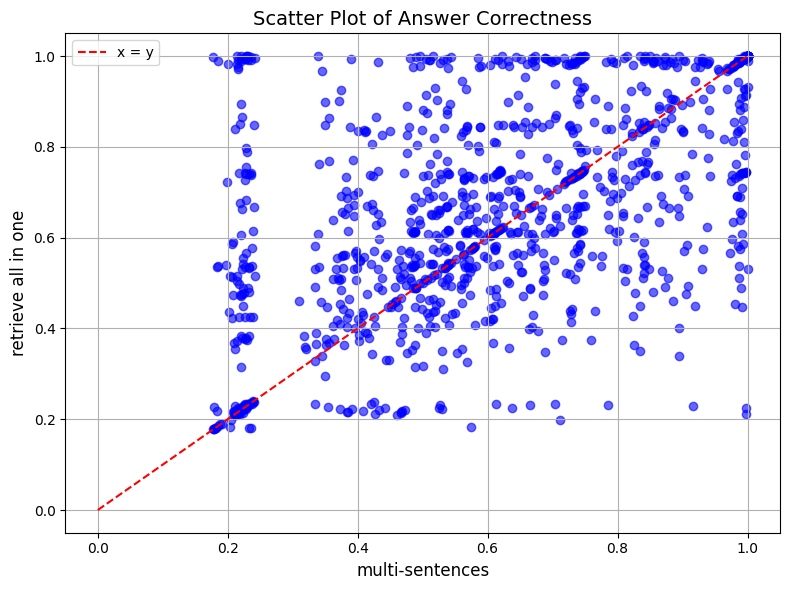

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
one = pd.read_csv("./10000/one/gpt-4o-batch-all-target_one_retrieved_contexts_dataset_condition_2_answer_correctness_2024-12-25-22-18-00.csv")
document = pd.read_csv("./10000/document/gpt-4o-batch-all-target_document_retrieved_contexts_dataset_condition_2_answer_correctness_2024-12-26-15-10-20.csv")
section = pd.read_csv("./10000/section/gpt-4o-batch-all-target_section_retrieved_contexts_dataset_condition_2_answer_correctness_2024-12-26-17-48-59.csv")
paragraph = pd.read_csv("./10000/paragraph/gpt-4o-batch-all-target_paragraph_retrieved_contexts_dataset_condition_2_answer_correctness_2024-12-26-18-18-41.csv")
multi = pd.read_csv("./10000/multi/gpt-4o-batch-all-target_multi_retrieved_contexts_dataset_condition_2_answer_correctness_2024-12-26-18-32-52.csv")
native_rag = pd.read_csv("./10000/native_rag/native_rag_condition_3_answer_correctness_2025-01-05-21-44-13.csv")

# Extract the `answer_correctness` column
one_topp_correctness = one['answer_correctness']
multi_correctness = multi['answer_correctness']

# Create the scatter plot
plt.figure(figsize=(8, 6))
# Add the line x = y
plt.scatter(multi_correctness, one_topp_correctness, color='blue', alpha=0.6)
max_value = max(max(one_topp_correctness), max(multi_correctness))  # Determine the range for x=y
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='x = y')


# Add labels, title, and legend
plt.title("Scatter Plot of Answer Correctness", fontsize=14)
plt.xlabel("multi-sentences", fontsize=12)
plt.ylabel("retrieve all in one", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# Define thresholds for "high" and "low"
high_threshold = 0.8  # Adjust based on your data
low_threshold = 0.3   # Adjust based on your data

# Find points where one_topp_correctness is high and multi_correctness is low
high_one_low_multi = (one_topp_correctness >= high_threshold) & (multi_correctness < low_threshold)

selected_points = pd.DataFrame({
    "one_topp_correctness": one_topp_correctness[high_one_low_multi],
    "multi_correctness": multi_correctness[high_one_low_multi]
})
selected_points

,one_topp_correctness,multi_correctness
28,1.000000,0.231221
73,0.972529,0.215828
90,0.992328,0.215905
102,0.996072,0.225679
108,1.000000,0.230032
109,0.894551,0.220075
123,1.000000,0.228615
147,0.866135,0.222357
160,0.993388,0.225954
191,0.850000,0.218842


In [14]:
import ast

row_id = 405
print(f"Question: {one.iloc[row_id]['question']}")
contexts = ast.literal_eval(one.iloc[row_id]['contexts'])
print(f"Contexts: {len(contexts)}")
for item in contexts:
    print(f"    {item}")
print("- document")
contexts = ast.literal_eval(document.iloc[row_id]['contexts'])
print(f"Contexts: {len(contexts)}")
for item in contexts:
    print(f"    {item}")
print("- section")
contexts = ast.literal_eval(section.iloc[row_id]['contexts'])
print(f"Contexts: {len(contexts)}")
for item in contexts:
    print(f"    {item}")
print("- paragraph")
contexts = ast.literal_eval(paragraph.iloc[row_id]['contexts'])
print(f"Contexts: {len(contexts)}")
for item in contexts:
    print(f"    {item}")
print("- multi")
contexts = ast.literal_eval(multi.iloc[row_id]['contexts'])
print(f"Contexts: {len(contexts)}")
for item in contexts:
    print(f"    {item}")
print("- native rag")
contexts = ast.literal_eval(native_rag.iloc[row_id]['contexts'])
print(f"Contexts: {len(contexts)}")
for item in contexts:
    print(f"    {item}")
print(f"Answer: {one.iloc[row_id]['answer']}")
print(f"Ground truth: {one.iloc[row_id]['ground_truth']}")

Question: What processing techniques were used to produce the semi-solid aqueous extract of Euphorbia thymifolia?
Contexts: 1
    This study examines the chemical components of Euphorbia thymifolia using different solvents for extraction, resulting in a semi-solid aqueous extract produced through a series of processing techniques such as Soxhlet and maceration.In preliminary phytochemical test of ethanol extract of Euphorbia thymifolia L.In preliminary phytochemical test of ethanol extract of Euphorbia thymifolia L.The selected plant material (crude drugs) Euphorbia thymifolia L. was collected from local place and dried in the shade. Then the dried material is pulverized in grinder. The powdered material was passed through 120 mesh sieves to remove fine powder and course powder was used for extraction. Continuous Soxhlet extraction method used for extraction. Each powered batch (200 gm. powder) loaded for extraction. [13] Further for Preparations of Hexane extract: Weighed accurately c

,question,contexts,answer,ground_truth,answer_correctness
0,What structural factor allows for easy water a...,['This research investigates the differences i...,Cracked cuticles in soybean cultivars allow fo...,Cracked cuticles allow for easy water absorpti...,0.619021
1,Why do intact cuticles remain impermeable to w...,['What components of the intact outer cuticle ...,Intact cuticles remain impermeable to water du...,Intact cuticles remain impermeable due to the ...,0.730276
2,How can the permeability of intact cuticles be...,['What components of the intact outer cuticle ...,No related contexts found.,Heat and alkaline treatments can temporarily r...,0.175211
3,Why has the production of healthy sweeteners l...,['The production of healthy sweeteners like fr...,The production of healthy sweeteners like fruc...,The production of healthy sweeteners like fruc...,0.744901
4,What are the methods mentioned for producing f...,['Monosaccharides can be generated through var...,Fructose can be produced through methods such ...,Fructose can be made using either multi-enzyma...,0.222745
...,...,...,...,...,...
1113,What are the primary lifestyle factors contrib...,['Is Consumption of High-Fructose Corn Syrup L...,The primary lifestyle factors contributing to ...,Obesity is commonly caused by excessive food i...,0.222193
1114,How do sedentary lifestyles affect energy meta...,['Metabolic response to metformin in the whole...,No related contexts found.,Sedentary lifestyles affect the homeostasis of...,0.180499
1115,What potential strategies are suggested by the...,['Although the manufacturing of living A. muci...,The research suggests developing food or pharm...,The research suggests both indirect and direct...,0.579939
1116,How do mental and physical conditions impact t...,['Influence the gut microbiota population and ...,Mental and physical conditions can significant...,Mental and physical conditions of the host sev...,0.897888


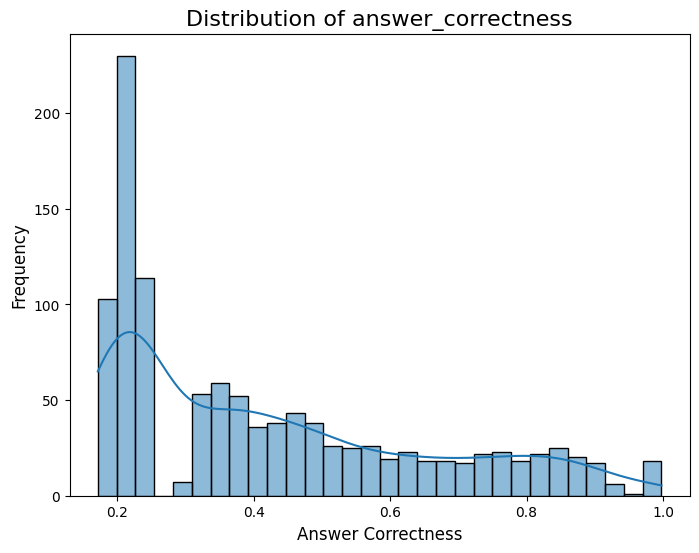

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['answer_correctness'], bins=30, kde=True)

# Add title and labels
plt.title('Distribution of answer_correctness', fontsize=16)
plt.xlabel('Answer Correctness', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [3]:
condition = 'condition_2'
visulize_result_with_condition(condition, matrixes)

experiment: condition_2


In [ ]:
import pandas as pd
recall = pd.read_csv('dataset_condition_1_context_recall_2024-10-13-12-40-25.csv')

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1110    1.0
1111    1.0
1112    1.0
1113    1.0
1114    1.0
Name: context_recall, Length: 1115, dtype: float64

In [15]:
# Assuming entity_recall is a pandas DataFrame
filtered_recall = recall[recall['context_recall'] < 0.5]

save_name = 'filtered_recall.txt'
# Open a text file to write the output
with open(save_name, 'w') as f:
    # Iterate over the filtered DataFrame and write each element to the file
    for index, row in filtered_recall.iterrows():
        f.write(f"Row {index}:\n")
        f.write(f"Question: {row['question']}\n")
        f.write(f"Ground Truth: {row['ground_truth']}\n")
        f.write(f"Answer: {row['answer']}\n")
        f.write(f"Contexts: {row['contexts']}\n")
        f.write(f"Context Entity Recall: {row['context_recall']}\n")
        f.write("\n")  # Adding a blank line for better readability

print(f"Filtered entity recall has been written to '{save_name}'")


Filtered entity recall has been written to 'filtered_recall.txt'


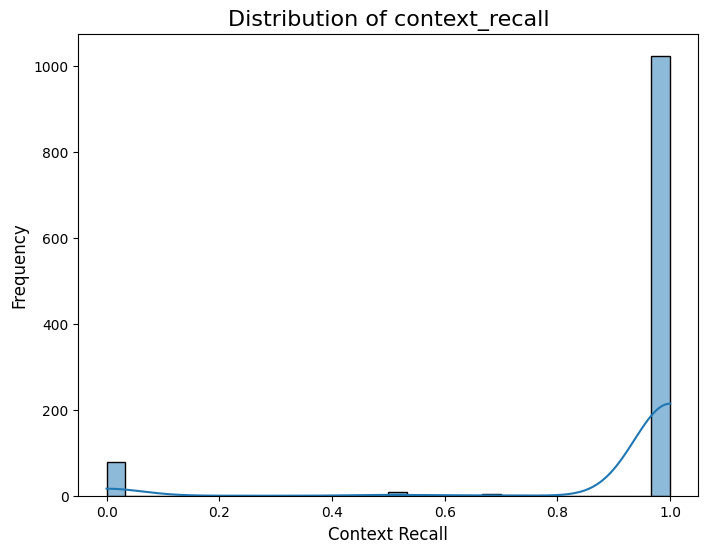

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(recall['context_recall'], bins=30, kde=True)

# Add title and labels
plt.title('Distribution of context_recall', fontsize=16)
plt.xlabel('Context Recall', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [23]:
from datasets import Dataset
from ragas import evaluate

from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_similarity,
    answer_correctness,
    context_precision,
    context_utilization,
    context_recall,
    context_entity_recall,
    noise_sensitivity_relevant,
    noise_sensitivity_irrelevant
)
import os
import sys
sys.path.insert(0, os.path.abspath('../../..'))
from configs.load_config import load_configs
load_configs()

dataset = Dataset.from_dict(
    {
        'question': ['What are the recent advancements in isolating new microorganisms that produce cellulase enzymes for bioethanol production?'],
        'ground_truth': ['Recent advancements in isolating new microorganisms focus on discovering bacteria and fungi from extreme environments that exhibit higher stability and activity of cellulase enzymes. Techniques such as metagenomics and high-throughput screening have accelerated the identification of these microorganisms. Advances in genetic modification and synthetic biology have also enabled the engineering of microbial strains to enhance their cellulase production capabilities.'],
        'answer': ['The research article discusses recent advancements in isolating new microorganisms that produce cellulase enzymes, which are crucial for the efficient conversion of cellulose in lignocellulosic biomass to bioethanol. These advancements include the identification and characterization of novel microbial strains with enhanced cellulase production capabilities. The authors emphasize the significance of exploring diverse environments, such as extreme habitats or underexplored ecosystems, to discover microorganisms that can produce more effective cellulase cocktails. Additionally, advancements in molecular techniques and genomic analysis have facilitated the identification of specific genes responsible for cellulase production, allowing for targeted isolation and optimization of these microorganisms. Overall, the focus on isolating new cellulase-producing microorganisms is seen as a key growth area in the cellulase industry, with the potential to improve bioethanol production efficiency.'],
        'contexts': [['This research article explores recent developments in improving cellulase cocktail performance for efficient conversion of cellulose in lignocellulosic biomass to bioethanol. The authors discuss the importance of isolating new microorganisms that produce these enzymes and highlight potential growth areas in the cellulase industry.']]
    }
)

evaluate(
    dataset=dataset,
    metrics=[context_recall],
    raise_exceptions=True
)

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

[ContextRecallClassificationAnswers(__root__=[ContextRecallClassificationAnswer(statement='Recent advancements in isolating new microorganisms focus on discovering bacteria and fungi from extreme environments that exhibit higher stability and activity of cellulase enzymes.', attributed=1, reason='The context mentions the importance of isolating new microorganisms that produce cellulase enzymes.'), ContextRecallClassificationAnswer(statement='Techniques such as metagenomics and high-throughput screening have accelerated the identification of these microorganisms.', attributed=0, reason='The context does not provide specific techniques used for identifying microorganisms.'), ContextRecallClassificationAnswer(statement='Advances in genetic modification and synthetic biology have also enabled the engineering of microbial strains to enhance their cellulase production capabilities.', attributed=0, reason='The context does not mention genetic modification or synthetic biology in relation to c

{'context_recall': 0.3333}

In [9]:
entity_recall = pd.read_csv('dataset_condition_1_context_entity_recall_2024-10-13-12-40-25.csv')
entity_recall

,question,ground_truth,answer,contexts,context_entity_recall
0,What structural factor allows for easy water a...,Cracked cuticles allow for easy water absorpti...,Cracked cuticles in soybean cultivars allow fo...,['This research investigates the differences i...,0.666667
1,Why do intact cuticles remain impermeable to w...,Intact cuticles remain impermeable due to the ...,Intact cuticles remain impermeable to water be...,['This research investigates the differences i...,0.500000
2,How can the permeability of intact cuticles be...,Heat and alkaline treatments can temporarily r...,The permeability of intact cuticles can be tem...,['This research investigates the differences i...,0.666667
3,Why has the production of healthy sweeteners l...,The production of healthy sweeteners like fruc...,The production of healthy sweeteners like fruc...,['The production of healthy sweeteners like fr...,1.000000
4,What are the methods mentioned for producing f...,Fructose can be made using either multi-enzyma...,Fructose can be produced using either multi-en...,['The production of healthy sweeteners like fr...,0.750000
...,...,...,...,...,...
1110,What are the primary lifestyle factors contrib...,Obesity is commonly caused by excessive food i...,The primary lifestyle factors contributing to ...,['Obesity is one of very first warning signs f...,0.333333
1111,How do sedentary lifestyles affect energy meta...,Sedentary lifestyles affect the homeostasis of...,Sedentary lifestyles negatively impact energy ...,"['In fact, it is usually the consequence of se...",0.666667
1112,What potential strategies are suggested by the...,The research suggests both indirect and direct...,The research suggests that there may be indire...,['Although the manufacturing of living A. muci...,1.000000
1113,How do mental and physical conditions impact t...,Mental and physical conditions of the host sev...,Mental and physical conditions significantly i...,['Gut microbiota symbiotically reside in human...,0.200000


In [18]:
# Assuming entity_recall is a pandas DataFrame
filtered_entity_recall = entity_recall[entity_recall['context_entity_recall'] < 0.5]

save_name = 'filtered_entity_recall.txt'
# Open a text file to write the output
with open(save_name, 'w') as f:
    # Iterate over the filtered DataFrame and write each element to the file
    for index, row in filtered_entity_recall.iterrows():
        f.write(f"Row {index}:\n")
        f.write(f"Question: {row['question']}\n")
        f.write(f"Ground Truth: {row['ground_truth']}\n")
        f.write(f"Answer: {row['answer']}\n")
        f.write(f"Contexts: {row['contexts']}\n")
        f.write(f"Context Entity Recall: {row['context_entity_recall']}\n")
        f.write("\n")  # Adding a blank line for better readability

print(f"Filtered entity recall has been written to '{save_name}'")

Filtered entity recall has been written to 'filtered_entity_recall.txt'


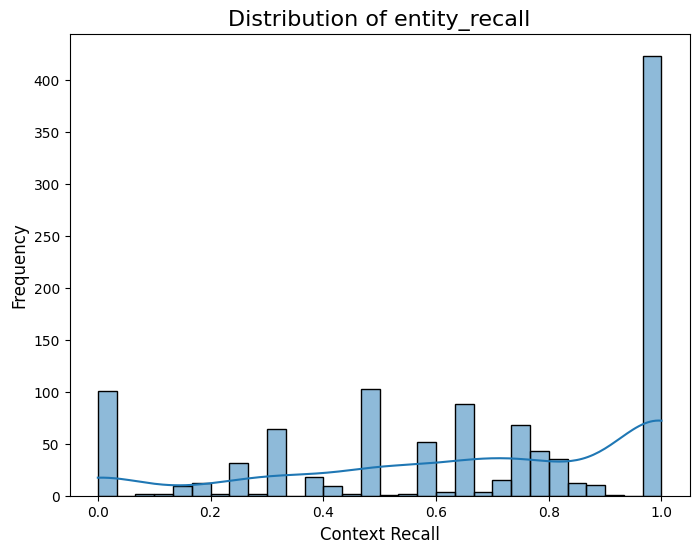

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(entity_recall['context_entity_recall'], bins=30, kde=True)

# Add title and labels
plt.title('Distribution of entity_recall', fontsize=16)
plt.xlabel('Context Recall', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

### Meger csv files

In [ ]:
import pandas as pd

def merge_two_files(file1, file2, merge_file_name):
    # Step 1: Read the two CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Step 2: Concatenate the DataFrames row-wise (stack the rows of df2 under df1)
    merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)

    # Step 3: Save the merged DataFrame to a new CSV file
    merged_df.to_csv(merge_file_name, index=False)
